In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv('/content/drive/MyDrive/뽀로로드/data(아파트시세_코랩가공)/final(연식 평균 컬럼 추가).csv', encoding='cp949')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594107 entries, 0 to 1594106
Data columns (total 24 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1594107 non-null  int64  
 1   자치구명        1594107 non-null  object 
 2   층           1594107 non-null  float64
 3   계약일         1594107 non-null  float64
 4   임대면적        1594107 non-null  float64
 5   건물명         1124797 non-null  object 
 6   건물용도        1594107 non-null  object 
 7   연식          1566241 non-null  float64
 8   동별 평균 연식    1594102 non-null  float64
 9   구별 평균 연식    1594107 non-null  float64
 10  전세가         1594107 non-null  float64
 11  평당전세가       1594107 non-null  float64
 12  동           1594107 non-null  object 
 13  공원          1594107 non-null  float64
 14  마트          1594107 non-null  float64
 15  버스정류장       1594107 non-null  float64
 16  어린이집        1594107 non-null  float64
 17  CCTV        1594107 non-null  float64
 18  스타벅스        1594107 no

In [5]:
df['계약일(년)'] = df['계약일'].astype(str).str[:4].astype(int)
df['계약일(월)'] = df['계약일'].astype(str).str[4:6].astype(int)
df

,Unnamed: 0,자치구명,층,계약일,임대면적,건물명,건물용도,연식,동별 평균 연식,구별 평균 연식,...,어린이집,CCTV,스타벅스,대학교,병원,지하철,초중고,한강,계약일(년),계약일(월)
0,0,용산구,6.0,20200810.0,22.03,\t(1)\t,오피스텔,30.0,13.940659,20.914235,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2020,8
1,1,용산구,3.0,20200921.0,66.15,(65-17),연립다세대,12.0,13.940659,20.914235,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2020,9
2,2,용산구,5.0,20200225.0,29.72,7-12,연립다세대,1.0,13.940659,20.914235,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2020,2
3,3,용산구,4.0,20200210.0,29.94,7-12,연립다세대,1.0,13.940659,20.914235,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2020,2
4,4,용산구,5.0,20200111.0,29.69,yonginvill(7-5),연립다세대,2.0,13.940659,20.914235,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594102,1594329,강북구,15.0,20221229.0,29.22,수유역투웨니퍼스트,오피스텔,0.0,22.724690,19.539600,...,22.0,29.0,1.0,0.0,0.0,0.0,5.0,0.0,2022,12
1594103,1594330,강북구,8.0,20221230.0,127.25,해모로아파트,아파트,19.0,22.724690,19.539600,...,22.0,29.0,1.0,0.0,0.0,0.0,5.0,0.0,2022,12
1594104,1594331,강북구,10.0,20221231.0,41.30,주공1단지,아파트,31.0,22.724690,19.539600,...,22.0,29.0,1.0,0.0,0.0,0.0,5.0,0.0,2022,12
1594105,1594332,강북구,16.0,20221231.0,117.28,오동공원현대,아파트,21.0,22.724690,19.539600,...,22.0,29.0,1.0,0.0,0.0,0.0,5.0,0.0,2022,12


In [6]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder()
encoder = oh.fit_transform(df['자치구명'].values.reshape(-1,1)).toarray() # 인코딩 하기 전에 2차원 데이터로 변환

df_OneHot = pd.DataFrame(encoder, columns=["Gu_OneHot_Encoder_" + str(oh.categories_[0][i]) for i in range (len(oh.categories_[0]))])

df_merge = pd.concat([df, df_OneHot], axis=1)
df_merge

,Unnamed: 0,자치구명,층,계약일,임대면적,건물명,건물용도,연식,동별 평균 연식,구별 평균 연식,...,Gu_OneHot_Encoder_성동구,Gu_OneHot_Encoder_성북구,Gu_OneHot_Encoder_송파구,Gu_OneHot_Encoder_양천구,Gu_OneHot_Encoder_영등포구,Gu_OneHot_Encoder_용산구,Gu_OneHot_Encoder_은평구,Gu_OneHot_Encoder_종로구,Gu_OneHot_Encoder_중구,Gu_OneHot_Encoder_중랑구
0,0,용산구,6.0,20200810.0,22.03,\t(1)\t,오피스텔,30.0,13.940659,20.914235,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,용산구,3.0,20200921.0,66.15,(65-17),연립다세대,12.0,13.940659,20.914235,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,용산구,5.0,20200225.0,29.72,7-12,연립다세대,1.0,13.940659,20.914235,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,용산구,4.0,20200210.0,29.94,7-12,연립다세대,1.0,13.940659,20.914235,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,용산구,5.0,20200111.0,29.69,yonginvill(7-5),연립다세대,2.0,13.940659,20.914235,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594102,1594329,강북구,15.0,20221229.0,29.22,수유역투웨니퍼스트,오피스텔,0.0,22.724690,19.539600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1594103,1594330,강북구,8.0,20221230.0,127.25,해모로아파트,아파트,19.0,22.724690,19.539600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1594104,1594331,강북구,10.0,20221231.0,41.30,주공1단지,아파트,31.0,22.724690,19.539600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1594105,1594332,강북구,16.0,20221231.0,117.28,오동공원현대,아파트,21.0,22.724690,19.539600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_merge.loc[df_merge['동']=='신문로2가']

,Unnamed: 0,자치구명,층,계약일,임대면적,건물명,건물용도,연식,동별 평균 연식,구별 평균 연식,...,Gu_OneHot_Encoder_성동구,Gu_OneHot_Encoder_성북구,Gu_OneHot_Encoder_송파구,Gu_OneHot_Encoder_양천구,Gu_OneHot_Encoder_영등포구,Gu_OneHot_Encoder_용산구,Gu_OneHot_Encoder_은평구,Gu_OneHot_Encoder_종로구,Gu_OneHot_Encoder_중구,Gu_OneHot_Encoder_중랑구
1021859,1022023,종로구,2.0,20201015.0,40.15,디팰리스,오피스텔,0.0,15.038835,19.36861,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1021860,1022024,종로구,6.0,20201008.0,51.34,디팰리스,오피스텔,0.0,15.038835,19.36861,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1021861,1022025,종로구,6.0,20200929.0,53.75,디팰리스,오피스텔,0.0,15.038835,19.36861,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1021862,1022026,종로구,5.0,20201021.0,53.75,디팰리스,오피스텔,0.0,15.038835,19.36861,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1021863,1022027,종로구,4.0,20201014.0,70.70,디팰리스,오피스텔,0.0,15.038835,19.36861,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021962,1022126,종로구,3.0,20221109.0,38.27,(1-166),연립다세대,0.0,15.038835,19.36861,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1021963,1022127,종로구,1.0,20221120.0,38.94,NaN,단독다가구,37.0,15.038835,19.36861,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1021964,1022128,종로구,4.0,20221124.0,84.68,인더팰리스 광화문,연립다세대,24.0,15.038835,19.36861,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1021965,1022129,종로구,1.0,20221129.0,16.51,NaN,단독다가구,52.0,15.038835,19.36861,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
encoder = oh.fit_transform(df['건물용도'].values.reshape(-1,1)).toarray() # 인코딩 하기 전에 2차원 데이터로 변환

df_OneHot = pd.DataFrame(encoder, columns=["Type_OneHot_Encoder_" + str(oh.categories_[0][i]) for i in range (len(oh.categories_[0]))])

df_merge = pd.concat([df_merge, df_OneHot], axis=1)
df_merge

,Unnamed: 0,자치구명,층,계약일,임대면적,건물명,건물용도,연식,동별 평균 연식,구별 평균 연식,...,Gu_OneHot_Encoder_영등포구,Gu_OneHot_Encoder_용산구,Gu_OneHot_Encoder_은평구,Gu_OneHot_Encoder_종로구,Gu_OneHot_Encoder_중구,Gu_OneHot_Encoder_중랑구,Type_OneHot_Encoder_단독다가구,Type_OneHot_Encoder_아파트,Type_OneHot_Encoder_연립다세대,Type_OneHot_Encoder_오피스텔
0,0,용산구,6.0,20200810.0,22.03,\t(1)\t,오피스텔,30.0,13.940659,20.914235,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,용산구,3.0,20200921.0,66.15,(65-17),연립다세대,12.0,13.940659,20.914235,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,용산구,5.0,20200225.0,29.72,7-12,연립다세대,1.0,13.940659,20.914235,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,용산구,4.0,20200210.0,29.94,7-12,연립다세대,1.0,13.940659,20.914235,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,용산구,5.0,20200111.0,29.69,yonginvill(7-5),연립다세대,2.0,13.940659,20.914235,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594102,1594329,강북구,15.0,20221229.0,29.22,수유역투웨니퍼스트,오피스텔,0.0,22.724690,19.539600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1594103,1594330,강북구,8.0,20221230.0,127.25,해모로아파트,아파트,19.0,22.724690,19.539600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1594104,1594331,강북구,10.0,20221231.0,41.30,주공1단지,아파트,31.0,22.724690,19.539600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1594105,1594332,강북구,16.0,20221231.0,117.28,오동공원현대,아파트,21.0,22.724690,19.539600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
df_merge.columns

Index(['Unnamed: 0', '자치구명', '층', '계약일', '임대면적', '건물명', '건물용도', '연식',
       '동별 평균 연식', '구별 평균 연식', '전세가', '평당전세가', '동', '공원', '마트', '버스정류장',
       '어린이집', 'CCTV', '스타벅스', '대학교', '병원', '지하철', '초중고', '한강', '계약일(년)',
       '계약일(월)', 'Gu_OneHot_Encoder_강남구', 'Gu_OneHot_Encoder_강동구',
       'Gu_OneHot_Encoder_강북구', 'Gu_OneHot_Encoder_강서구',
       'Gu_OneHot_Encoder_관악구', 'Gu_OneHot_Encoder_광진구',
       'Gu_OneHot_Encoder_구로구', 'Gu_OneHot_Encoder_금천구',
       'Gu_OneHot_Encoder_노원구', 'Gu_OneHot_Encoder_도봉구',
       'Gu_OneHot_Encoder_동대문구', 'Gu_OneHot_Encoder_동작구',
       'Gu_OneHot_Encoder_마포구', 'Gu_OneHot_Encoder_서대문구',
       'Gu_OneHot_Encoder_서초구', 'Gu_OneHot_Encoder_성동구',
       'Gu_OneHot_Encoder_성북구', 'Gu_OneHot_Encoder_송파구',
       'Gu_OneHot_Encoder_양천구', 'Gu_OneHot_Encoder_영등포구',
       'Gu_OneHot_Encoder_용산구', 'Gu_OneHot_Encoder_은평구',
       'Gu_OneHot_Encoder_종로구', 'Gu_OneHot_Encoder_중구',
       'Gu_OneHot_Encoder_중랑구', 'Type_OneHot_Encoder_단독다가구',
       'Type_OneHot_Encode

In [10]:
# 원핫인코딩 완료 후 object column 제거
# 임대면적, 전세가 삭제
df_merge=df_merge[['동', '연식', '동별 평균 연식', '구별 평균 연식', '층', '계약일', '계약일(년)', '계약일(월)',
                   '공원', '마트', '버스정류장', '어린이집', 'CCTV', '스타벅스', '대학교', '병원', '지하철', '초중고', '한강',
                  'Gu_OneHot_Encoder_강남구', 'Gu_OneHot_Encoder_강동구',
                  'Gu_OneHot_Encoder_강북구', 'Gu_OneHot_Encoder_강서구',
                  'Gu_OneHot_Encoder_관악구', 'Gu_OneHot_Encoder_광진구',
                  'Gu_OneHot_Encoder_구로구', 'Gu_OneHot_Encoder_금천구',
                  'Gu_OneHot_Encoder_노원구', 'Gu_OneHot_Encoder_도봉구',
                  'Gu_OneHot_Encoder_동대문구', 'Gu_OneHot_Encoder_동작구',
                  'Gu_OneHot_Encoder_마포구', 'Gu_OneHot_Encoder_서대문구',
                  'Gu_OneHot_Encoder_서초구', 'Gu_OneHot_Encoder_성동구',
                  'Gu_OneHot_Encoder_성북구', 'Gu_OneHot_Encoder_송파구',
                  'Gu_OneHot_Encoder_양천구', 'Gu_OneHot_Encoder_영등포구',
                  'Gu_OneHot_Encoder_용산구', 'Gu_OneHot_Encoder_은평구',
                  'Gu_OneHot_Encoder_종로구', 'Gu_OneHot_Encoder_중구',
                  'Gu_OneHot_Encoder_중랑구', 'Type_OneHot_Encoder_단독다가구',
                  'Type_OneHot_Encoder_아파트', 'Type_OneHot_Encoder_연립다세대',
                  'Type_OneHot_Encoder_오피스텔', '평당전세가']]
df_merge.set_index('동', drop=True, inplace=True)
df_merge

,연식,동별 평균 연식,구별 평균 연식,층,계약일,계약일(년),계약일(월),공원,마트,버스정류장,...,Gu_OneHot_Encoder_용산구,Gu_OneHot_Encoder_은평구,Gu_OneHot_Encoder_종로구,Gu_OneHot_Encoder_중구,Gu_OneHot_Encoder_중랑구,Type_OneHot_Encoder_단독다가구,Type_OneHot_Encoder_아파트,Type_OneHot_Encoder_연립다세대,Type_OneHot_Encoder_오피스텔,평당전세가
동,,,,,,,,,,,,,,,,,,,,,
원효로2가,30.0,13.940659,20.914235,6.0,20200810.0,2020,8,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,748.978665
원효로2가,12.0,13.940659,20.914235,3.0,20200921.0,2020,9,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1396.825397
원효로2가,1.0,13.940659,20.914235,5.0,20200225.0,2020,2,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2997.981157
원효로2가,1.0,13.940659,20.914235,4.0,20200210.0,2020,2,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3031.062124
원효로2가,2.0,13.940659,20.914235,5.0,20200111.0,2020,1,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1902.358898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
번동,0.0,22.724690,19.539600,15.0,20221229.0,2022,12,2.0,2.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4449.254012
번동,19.0,22.724690,19.539600,8.0,20221230.0,2022,12,2.0,2.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1426.326130
번동,31.0,22.724690,19.539600,10.0,20221231.0,2022,12,2.0,2.0,99.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1358.353511


In [11]:
df_merge.to_csv("/content/drive/MyDrive/뽀로로드/data(아파트시세_코랩가공)/onehotcoding(연식 평균 컬럼 추가).csv", encoding='cp949')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


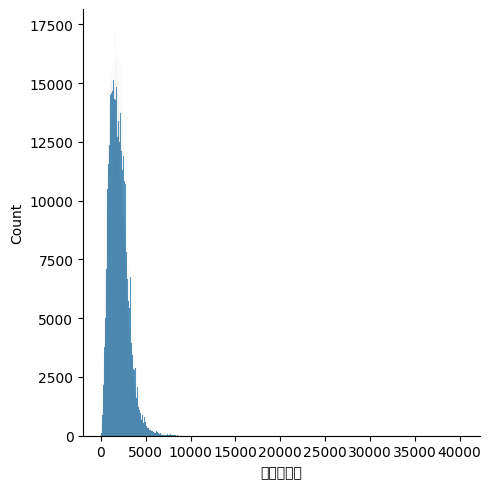

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.displot(df_merge['평당전세가'])
plt.show()

In [16]:
df_merge['로그전세가'] = np.log1p(df_merge['평당전세가'])
real_price = df_merge['평당전세가'] # 원래 가격
df_merge.drop('평당전세가', axis=1, inplace=True)
df_merge.head(1)

<ipython-input-16-76d37dd99348>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge['로그전세가'] = np.log1p(df_merge['평당전세가'])
<ipython-input-16-76d37dd99348>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge.drop('평당전세가', axis=1, inplace=True)


,연식,동별 평균 연식,구별 평균 연식,층,계약일,계약일(년),계약일(월),공원,마트,버스정류장,...,Gu_OneHot_Encoder_용산구,Gu_OneHot_Encoder_은평구,Gu_OneHot_Encoder_종로구,Gu_OneHot_Encoder_중구,Gu_OneHot_Encoder_중랑구,Type_OneHot_Encoder_단독다가구,Type_OneHot_Encoder_아파트,Type_OneHot_Encoder_연립다세대,Type_OneHot_Encoder_오피스텔,로그전세가
동,,,,,,,,,,,,,,,,,,,,,
원효로2가,30.0,13.940659,20.914235,6.0,20200810.0,2020,8,0.0,0.0,7.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.620045


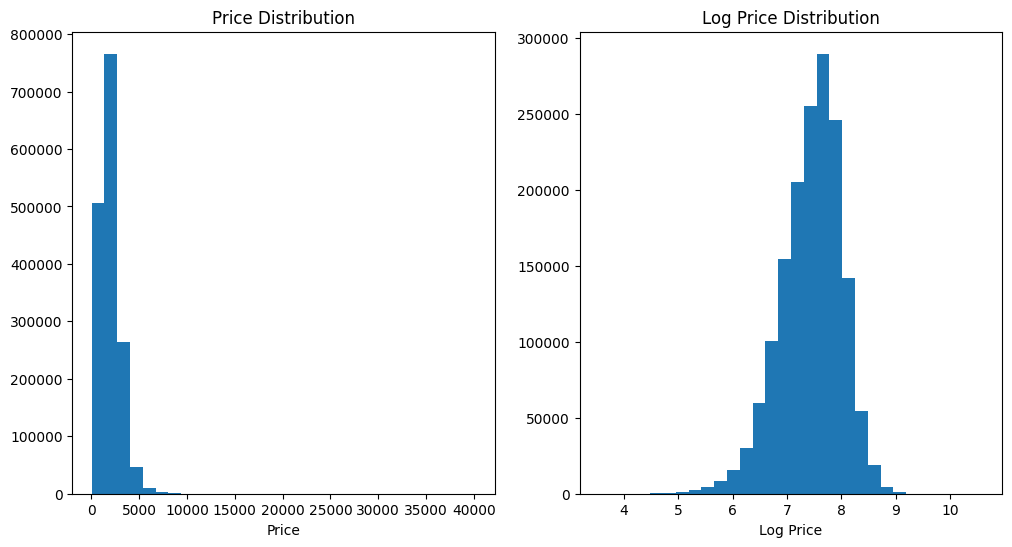

In [18]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))

ax1.hist(real_price, bins=30)
ax1.set_title('Price Distribution')
ax1.set_xlabel('Price')

ax2.hist(df_merge['로그전세가'], bins=30)
ax2.set_title('Log Price Distribution')
ax2.set_xlabel('Log Price')

plt.show()

In [19]:
df_merge.to_csv("/content/drive/MyDrive/뽀로로드/data(아파트시세_코랩가공)/onehotcoding(로그변환).csv", encoding='cp949')